In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('customer_behavior.csv')

In [4]:
df.head()

,CustomerID,Gender,Region,PurchaseAmount,ProductCategory,Churn,CampaignGroup
0,1001,Male,South,256.07,Fashion,No,A
1,1002,Female,South,NaN,Electronics,Yes,B
2,1003,Female,West,1194.41,Fashion,No,A
3,1004,Female,South,413.06,Grocery,No,A
4,1005,Male,West,1556.32,Fashion,Yes,A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5000 non-null   int64  
 1   Gender           4903 non-null   object 
 2   Region           4825 non-null   object 
 3   PurchaseAmount   4850 non-null   float64
 4   ProductCategory  4474 non-null   object 
 5   Churn            4735 non-null   object 
 6   CampaignGroup    4815 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


In [6]:
# Q1. What is the average, median, and mode of PurchaseAmount
mean_val = df['PurchaseAmount'].mean()
median_val = df['PurchaseAmount'].median()
mode_val = df['PurchaseAmount'].mode()[0]

print(f"Average (Mean): {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")


Average (Mean): 1003.95
Median: 998.08
Mode: 0.00


In [8]:
# Check missing values
print(df.isnull().sum())

# Handle missing PurchaseAmount by replacing with median
df['PurchaseAmount'].fillna(df['PurchaseAmount'].median(), inplace=True)

# Handle missing categorical values by replacing with mode
for col in ['Gender', 'Region', 'ProductCategory', 'Churn', 'CampaignGroup']:
    df[col].fillna(df[col].mode()[0], inplace=True)

CustomerID           0
Gender              97
Region             175
PurchaseAmount     150
ProductCategory    526
Churn              265
CampaignGroup      185
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5000 non-null   int64  
 1   Gender           5000 non-null   object 
 2   Region           5000 non-null   object 
 3   PurchaseAmount   5000 non-null   float64
 4   ProductCategory  5000 non-null   object 
 5   Churn            5000 non-null   object 
 6   CampaignGroup    5000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


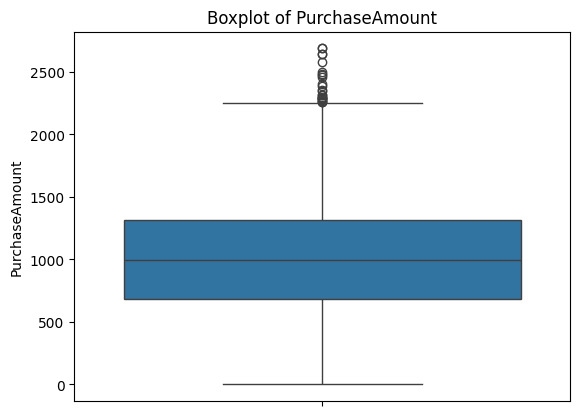

Number of outliers: 24


In [10]:
# Q2. Are there any outliers in the PurchaseAmount data?
sns.boxplot(df['PurchaseAmount'])
plt.title("Boxplot of PurchaseAmount")
plt.show()

# Using IQR method
Q1 = df['PurchaseAmount'].quantile(0.25)
Q3 = df['PurchaseAmount'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df[(df['PurchaseAmount'] < lower) | (df['PurchaseAmount'] > upper)]
print("Number of outliers:", len(outliers))


Skewness: 0.11
Kurtosis: -0.18


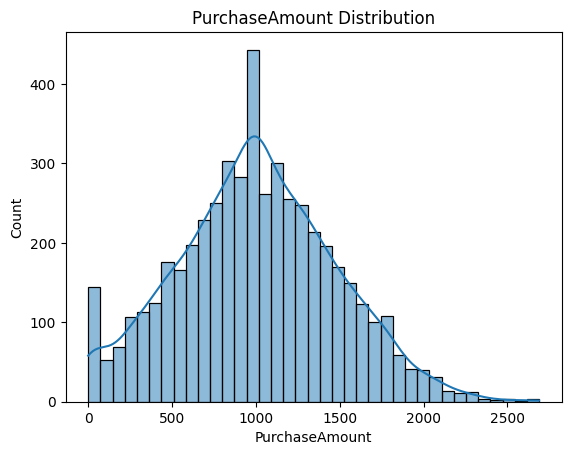

positive skewness 


In [12]:
# Q3. Is there any skewness or kurtosis in the PurchaseAmount distribution?
skewness = df['PurchaseAmount'].skew()
kurtosis = df['PurchaseAmount'].kurt()

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

sns.histplot(df['PurchaseAmount'], kde=True)
plt.title("PurchaseAmount Distribution")
plt.show()
print ("positive skewness ")


In [14]:
# Q4. Is there a significant difference in spending between male and female customers?
male = df[df['Gender']=='Male']['PurchaseAmount']
female = df[df['Gender']=='Female']['PurchaseAmount']

t_stat, p_val = stats.ttest_ind(male, female)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant difference between Male and Female spending.")
else:
    print("❌ No significant difference.")


T-statistic: 2.27, P-value: 0.0231
✅ Significant difference between Male and Female spending.


In [15]:
# Q5. Is there a relationship between ProductCategory and customer churn?
cont_table = pd.crosstab(df['ProductCategory'], df['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(cont_table)

print(f"Chi-Square: {chi2:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("✅ Significant relationship between ProductCategory and Churn.")
else:
    print("❌ No significant relationship.")

Chi-Square: 0.93, p-value: 0.6275
❌ No significant relationship.


In [16]:
# Q6. Does PurchaseAmount vary significantly across different regions?
anova = stats.f_oneway(
    *[df[df['Region']==region]['PurchaseAmount'] for region in df['Region'].unique()]
)
print(f"F-statistic: {anova.statistic:.2f}, P-value: {anova.pvalue:.4f}")

if anova.pvalue < 0.05:
    print("✅ PurchaseAmount varies significantly across regions.")
else:
    print("❌ No significant difference across regions.")

F-statistic: 0.39, P-value: 0.7627
❌ No significant difference across regions.


In [17]:
# Q7. Which email campaign (A or B) performed better in terms of average PurchaseAmount?
campaign_mean = df.groupby('CampaignGroup')['PurchaseAmount'].mean()
print(campaign_mean)

better = campaign_mean.idxmax()
print(f"✅ Campaign {better} performed better on average PurchaseAmount.")

CampaignGroup
A    1012.250984
B     994.435864
Name: PurchaseAmount, dtype: float64
✅ Campaign A performed better on average PurchaseAmount.


In [18]:
# Q8. Can we assume PurchaseAmount follows a normal distribution?
stat, p = stats.shapiro(df['PurchaseAmount'].sample(500))  # use sample to avoid warning
print(f"Shapiro-Wilk test p-value: {p:.4f}")

if p > 0.05:
    print("✅ Data is approximately normal.")
else:
    print("❌ Data is not normally distributed.")

Shapiro-Wilk test p-value: 0.0082
❌ Data is not normally distributed.


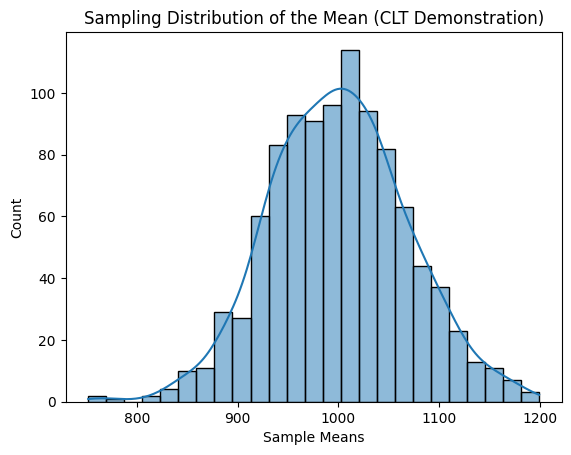

✅ According to CLT, even if PurchaseAmount is not normal, the sampling distribution of the mean is approximately normal.


In [19]:
# Q9. What insights can we gain by applying the Central Limit Theorem?
means = []
for i in range(1000):
    sample = df['PurchaseAmount'].sample(50)
    means.append(sample.mean())

sns.histplot(means, kde=True)
plt.title("Sampling Distribution of the Mean (CLT Demonstration)")
plt.xlabel("Sample Means")
plt.show()

print("✅ According to CLT, even if PurchaseAmount is not normal, the sampling distribution of the mean is approximately normal.")


In [20]:
# Q10. What is the 95% confidence interval for the average PurchaseAmount?
confidence_interval = stats.norm.interval(
    0.95,
    loc=df['PurchaseAmount'].mean(),
    scale=stats.sem(df['PurchaseAmount'])
)
print("95% Confidence Interval for Average PurchaseAmount:", confidence_interval)

95% Confidence Interval for Average PurchaseAmount: (np.float64(990.6132881188448), np.float64(1016.9358118811551))
